In [1]:
# usual imports
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../Resources/AI_Impact_On_Jobs_2030_cleaned.csv')

In [3]:
df.head()

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,0.46,0.33,0.14,0.65,0.06,0.72,0.94,0.00
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,0.40,0.05,0.97,0.23,0.09,0.62,0.38,0.98
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,0.56,0.39,0.02,0.23,0.24,0.68,0.61,0.83
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,0.57,0.03,0.84,0.45,0.40,0.93,0.73,0.33
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,0.59,0.97,0.61,0.28,0.30,0.17,0.02,0.42


In [4]:
bins = [-1, 2, 5, 10, 20, float('inf')]

labels = ['Entry/Junior', 'Early Career', 'Mid-Level', 'Senior', 'Expert/Late']

df['Experience_Band'] = pd.cut(df['Years_Experience'], 
                               bins=bins, 
                               labels=labels, 
                               right=False) 

In [5]:
print(df['Experience_Band'].value_counts(sort=True))

Experience_Band
Expert/Late     1032
Senior           983
Mid-Level        486
Early Career     301
Entry/Junior     198
Name: count, dtype: int64


In [6]:
df.groupby('Experience_Band')['Automation_Probability_2030'].mean().sort_values(ascending=False)

Experience_Band
Mid-Level       0.517037
Early Career    0.515150
Entry/Junior    0.507273
Expert/Late     0.498140
Senior          0.492014
Name: Automation_Probability_2030, dtype: float64

In [7]:
bins = [-float('inf'), 30500, 100000, float('inf')]
labels = ['Low', 'Middle', 'High']

df['Income_Band'] = pd.cut(df['Average_Salary'], 
                           bins=bins, 
                           labels=labels, 
                           right=False)

In [8]:
print(df['Income_Band'].value_counts(sort=False))

Income_Band
Low         11
Middle    1742
High      1247
Name: count, dtype: int64


In [9]:
job_sector_map = {
    "Security Guard":      "Security & Protective Services",
    "Research Scientist":  "Research & Development",
    "Construction Worker": "Construction",
    "Software Engineer":   "Digital & Technology",
    "Financial Analyst":   "Finance & Professional Services",
    "AI Engineer":         "Digital & Technology",
    "Mechanic":            "Transport & Automotive Services",
    "Teacher":             "Education",
    "HR Specialist":       "Business & Professional Services",
    "Customer Support":    "Customer Service",
    "UX Researcher":       "Digital & Creative Industries",
    "Lawyer":              "Legal Services",
    "Data Scientist":      "Digital & Technology",
    "Graphic Designer":    "Creative Industries",
    "Retail Worker":       "Retail & Consumer Services",
    "Doctor":              "Health & Social Care",
    "Truck Driver":        "Transport & Logistics",
    "Chef":                "Hospitality & Catering",
    "Nurse":               "Health & Social Care",
    "Marketing Manager":   "Marketing & Professional Services",
}

In [10]:
df['Job_Sector'] = df['Job_Title'].map(job_sector_map)

In [11]:
print(df['Job_Sector'].value_counts(sort=False))

Job_Sector
Security & Protective Services       154
Research & Development               149
Construction                         156
Digital & Technology                 482
Finance & Professional Services      151
Transport & Automotive Services      136
Education                            166
Business & Professional Services     157
Customer Service                     133
Digital & Creative Industries        167
Legal Services                       132
Creative Industries                  160
Retail & Consumer Services           155
Health & Social Care                 274
Transport & Logistics                153
Hospitality & Catering               141
Marketing & Professional Services    134
Name: count, dtype: int64


In [12]:
labour_group_map = {
    # ** Public_Sector **
    "Teacher":          "Public_Sector",
    "Doctor":           "Public_Sector",
    "Nurse":            "Public_Sector",

    # ** Private_Professional **
    "Financial Analyst":"Private_Professional",
    "HR Specialist":    "Private_Professional",
    "Lawyer":           "Private_Professional",
    "Marketing Manager":"Private_Professional",

    # ** Digital_Creative **
    "Research Scientist":"Digital_Creative",
    "Software Engineer": "Digital_Creative",
    "AI Engineer":       "Digital_Creative",
    "UX Researcher":     "Digital_Creative",
    "Data Scientist":    "Digital_Creative",
    "Graphic Designer":  "Digital_Creative",

    # ** Manual_Trade_Service **
    "Security Guard":    "Manual_Trade_Service",
    "Construction Worker":"Manual_Trade_Service",
    "Mechanic":          "Manual_Trade_Service",
    "Customer Support":  "Manual_Trade_Service",
    "Retail Worker":     "Manual_Trade_Service",
    "Truck Driver":      "Manual_Trade_Service",
    "Chef":              "Manual_Trade_Service",
}

In [13]:
df['Labour_Group'] = df['Job_Title'].map(labour_group_map)

In [14]:
print(df['Labour_Group'].value_counts(sort=False))

Labour_Group
Manual_Trade_Service    1028
Digital_Creative         958
Private_Professional     574
Public_Sector            440
Name: count, dtype: int64


In [15]:
df['Job_Sector'] = df['Job_Sector'].fillna('Other')
df['Labour_Group'] = df['Labour_Group'].fillna('Other')

In [16]:
print(df['Labour_Group'].value_counts(sort=False))

Labour_Group
Manual_Trade_Service    1028
Digital_Creative         958
Private_Professional     574
Public_Sector            440
Name: count, dtype: int64


In [17]:
print(df['Job_Sector'].value_counts(sort=False))

Job_Sector
Security & Protective Services       154
Research & Development               149
Construction                         156
Digital & Technology                 482
Finance & Professional Services      151
Transport & Automotive Services      136
Education                            166
Business & Professional Services     157
Customer Service                     133
Digital & Creative Industries        167
Legal Services                       132
Creative Industries                  160
Retail & Consumer Services           155
Health & Social Care                 274
Transport & Logistics                153
Hospitality & Catering               141
Marketing & Professional Services    134
Name: count, dtype: int64


<Axes: xlabel='Labour_Group'>

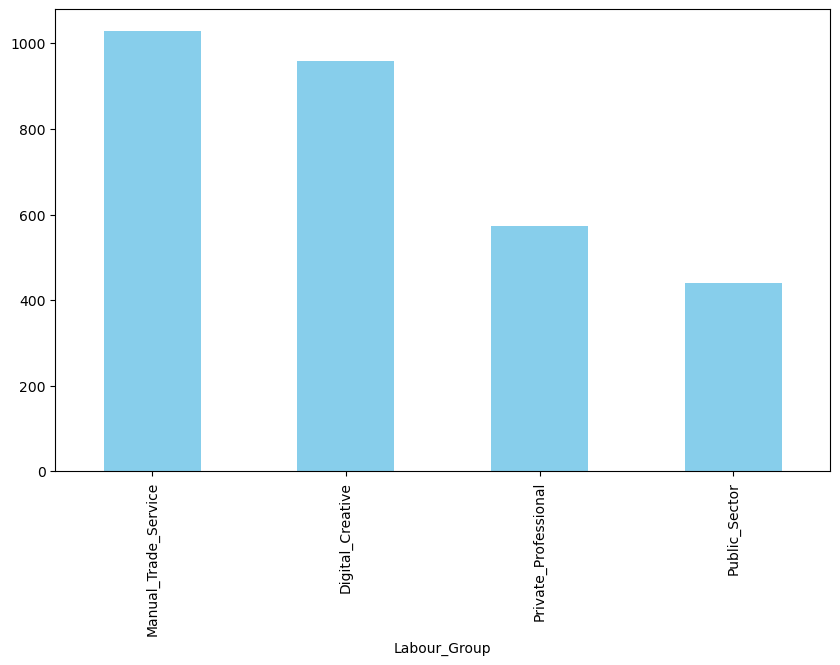

In [18]:
df['Labour_Group'].value_counts(sort=True).plot(kind='bar', figsize=(10,6), color='skyblue')

<Axes: xlabel='Job_Sector'>

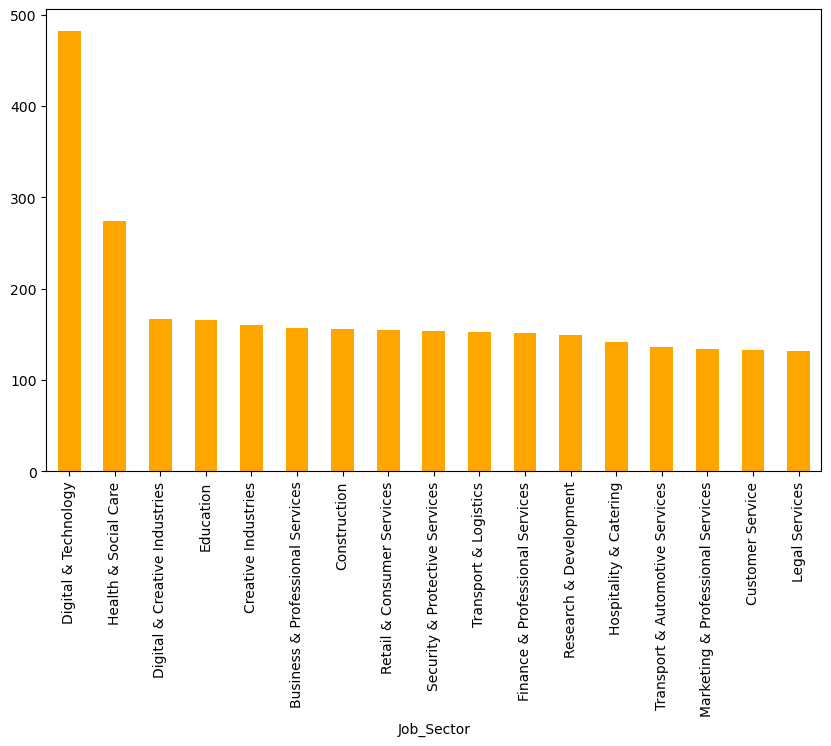

In [19]:
df['Job_Sector'].value_counts(sort=True).plot(kind='bar', figsize=(10,6), color='orange')

In [20]:
df.head()

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,...,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10,Experience_Band,Income_Band,Job_Sector,Labour_Group
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,...,0.14,0.65,0.06,0.72,0.94,0.00,Expert/Late,Middle,Security & Protective Services,Manual_Trade_Service
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,...,0.97,0.23,0.09,0.62,0.38,0.98,Expert/Late,High,Research & Development,Digital_Creative
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,...,0.02,0.23,0.24,0.68,0.61,0.83,Early Career,High,Construction,Manual_Trade_Service
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,...,0.84,0.45,0.40,0.93,0.73,0.33,Senior,High,Digital & Technology,Digital_Creative
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,...,0.61,0.28,0.30,0.17,0.02,0.42,Expert/Late,Middle,Finance & Professional Services,Private_Professional


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Job_Title                    3000 non-null   object  
 1   Average_Salary               3000 non-null   int64   
 2   Years_Experience             3000 non-null   int64   
 3   Education_Level              3000 non-null   object  
 4   AI_Exposure_Index            3000 non-null   float64 
 5   Tech_Growth_Factor           3000 non-null   float64 
 6   Automation_Probability_2030  3000 non-null   float64 
 7   Risk_Category                3000 non-null   object  
 8   Skill_1                      3000 non-null   float64 
 9   Skill_2                      3000 non-null   float64 
 10  Skill_3                      3000 non-null   float64 
 11  Skill_4                      3000 non-null   float64 
 12  Skill_5                      3000 non-null   float64 
 13  Ski

In [23]:
df.to_csv('../Resources/AI_Impact_On_Jobs_2030_feature_enriched.csv', index=False) #making sure the new index not included in new file